## Series Temporales. Analisis de la evolución de las condiciones temporles a los largo del tiempo.

In [1]:
# Descarga del fichero de trabajo
import pandas as pd
df=pd.read_csv('ds_data.csv',sep=';',decimal=',', encoding='ISO-8859-1',low_memory=False)

In [2]:
# Creamos una función para transformar las fechas 
# a formato valido para trabajar con series temporales

#Inputs de la función:
# lista --> Campo de la Fecha en el fichero
# formato --> formato de la fecha que posee el fichero
# inter --> nº de caracteres de cola de la fecha que no se van 
# a compilar. En este caso eliminamos sg y mins: -6

def date_f(lista,formato,inter):
    from datetime import datetime
    date=[]
    for i in lista:
        date.append(datetime.strptime(i[:inter], formato))
    return date

In [3]:
df.head()

,Fecha,Temperatura Bulbo Húmedo ValueY,Presion Atmosferica ValueY,Temperatura T1 ValueY,Potencia TG ValueY,T amb ValueY,Temperatura entrada aire despues el enfriador,Temperatura entrada aire antes el enfriador,Pot Modelo Amb,Pot Modelo 1
0,2/5/18 0:00,6.399996,964.629639,7.975193,14184.80293,7.853012,7.22,6.75,14375.24163,14096.81550
1,2/5/18 1:00,6.499996,964.722229,7.792778,14201.08848,7.269966,7.16,6.71,14384.48462,14119.32786
2,2/5/18 2:00,5.799997,965.277783,7.172565,14243.53018,6.642075,7.01,6.55,14455.02626,14173.66430
3,2/5/18 3:00,5.699997,963.796338,7.099598,14244.51719,6.552372,6.41,5.96,14446.00347,14169.99700
4,2/5/18 4:00,5.699997,963.796313,6.807732,14257.84189,6.417824,6.28,5.80,14449.44637,14175.79989


In [4]:
# Obtenemos el Data Frame preparado para trabajar con 
#o series temporales
dates=date_f(df['Fecha'],'%d/%m/%y %H',-3)
df['Fecha']=dates
df=df.set_index('Fecha')

In [5]:
df.head()

,Temperatura Bulbo Húmedo ValueY,Presion Atmosferica ValueY,Temperatura T1 ValueY,Potencia TG ValueY,T amb ValueY,Temperatura entrada aire despues el enfriador,Temperatura entrada aire antes el enfriador,Pot Modelo Amb,Pot Modelo 1
Fecha,,,,,,,,,
2018-05-02 00:00:00,6.399996,964.629639,7.975193,14184.80293,7.853012,7.22,6.75,14375.24163,14096.81550
2018-05-02 01:00:00,6.499996,964.722229,7.792778,14201.08848,7.269966,7.16,6.71,14384.48462,14119.32786
2018-05-02 02:00:00,5.799997,965.277783,7.172565,14243.53018,6.642075,7.01,6.55,14455.02626,14173.66430
2018-05-02 03:00:00,5.699997,963.796338,7.099598,14244.51719,6.552372,6.41,5.96,14446.00347,14169.99700
2018-05-02 04:00:00,5.699997,963.796313,6.807732,14257.84189,6.417824,6.28,5.80,14449.44637,14175.79989


## Representaciones Graficas

In [6]:
# Esta celda recoge los inputs de datos al grafico
#Input para el eje principal
time1='2018-05-24'
time2='2018-05-28'
var1='Potencia TG ValueY'
var2='Pot Modelo 1'
#var3='T amb ValueY'
#var4='Temperatura T1 ValueY'
#var5='Temperatura entrada aire despues el enfriador'
#Input para el eje secundario


Text(0,0.5,'Potencia (KWe)')

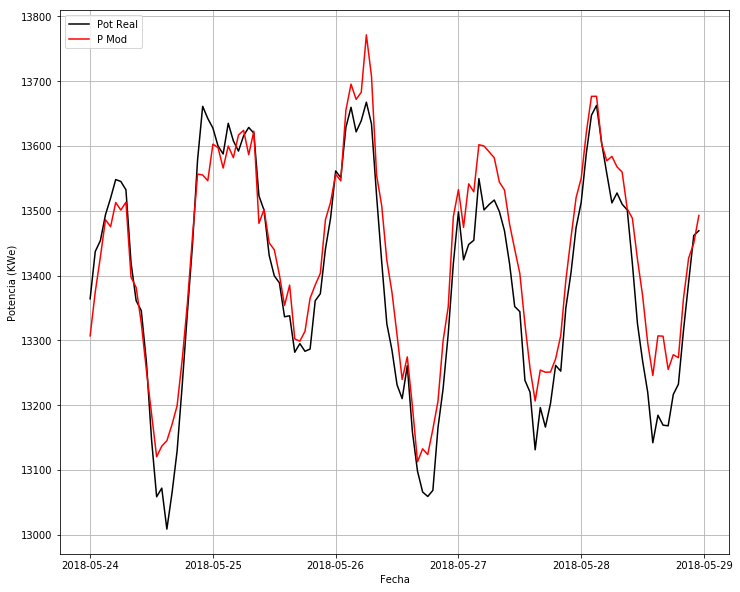

In [100]:
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
ax.plot(df[var1][time1:time2],'k',label='Pot Real')
#ax2=ax.twinx()
ax.plot(df[var2][time1:time2],'r',label='P Mod')
#ax2.plot(df[var5][time1:time2],'b',label='T SEnf')
#ax2.plot(df[var3][time1:time2],'c',label='T Amb')
#ax2.plot(df[var4][time1:time2],'g',label='T Comp')
ax.legend(loc=2)
ax2.legend(loc=1) 
ax.grid()
ax.set_xlabel('Fecha')
ax.set_ylabel('Potencia (KWe)')
#ax2.set_ylabel('Temperatura')
#ax2.set_ylim(900,1000 )